# BASIC UNDERSTANDING OF THE DATA

In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading dataset
beer_df = pd.read_csv('beer_reviews.csv')

In [3]:
beer_df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [4]:
print("Shape of the Dataset:", beer_df.shape, '\n')
print("-----------\n")
print("Important information about dataset:", beer_df.info(), '\n')
print("-----------\n")
print("Columns name in the dataset", beer_df.columns)

Shape of the Dataset: (1586614, 13) 

-----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB
Importa

In [5]:
beer_df.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


In [6]:
beer_df.dtypes

brewery_id              int64
brewery_name           object
review_time             int64
review_overall        float64
review_aroma          float64
review_appearance     float64
review_profilename     object
beer_style             object
review_palate         float64
review_taste          float64
beer_name              object
beer_abv              float64
beer_beerid             int64
dtype: object

In [7]:
beer_df.nunique()

brewery_id               5840
brewery_name             5742
review_time           1577960
review_overall             10
review_aroma                9
review_appearance          10
review_profilename      33387
beer_style                104
review_palate               9
review_taste                9
beer_name               56857
beer_abv                  530
beer_beerid             66055
dtype: int64

# -------------------------------------------------------------------------------------------------------------

# 1. DATA CLEANING

### Handling missing values

In [8]:
# Checking for null values in all columns
beer_df.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [9]:
mn = beer_df['beer_abv'].mean() # Checking for mean value
md = beer_df['beer_abv'].median() # Checking for median value

print(f"The mean of beer_abv is {mn} and median is {md}")

The mean of beer_abv is 7.042386753208429 and median is 6.5


In [10]:
# Since no big difference between mean and median, thus we can fill missing values with mean
beer_df['beer_abv'].fillna(beer_df['beer_abv'].mean(), inplace=True)

In [11]:
# Creating new dataframe with required columns only.

df = beer_df[['brewery_name', 'beer_name', 'beer_style', 'review_overall', 'review_aroma', 'review_appearance','review_palate', 'review_taste', 'beer_abv']]

In [12]:
df.head()

,brewery_name,beer_name,beer_style,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
0,Vecchio Birraio,Sausa Weizen,Hefeweizen,1.5,2.0,2.5,1.5,1.5,5.0
1,Vecchio Birraio,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,3.0,6.2
2,Vecchio Birraio,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,3.0,6.5
3,Vecchio Birraio,Sausa Pils,German Pilsener,3.0,3.0,3.5,2.5,3.0,5.0
4,Caldera Brewing Company,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,4.5,7.7


In [13]:
# Again checking for missing values
df.isnull().sum()

brewery_name         15
beer_name             0
beer_style            0
review_overall        0
review_aroma          0
review_appearance     0
review_palate         0
review_taste          0
beer_abv              0
dtype: int64

In [14]:
# Droping NULL/Missing Values
df.dropna(inplace = True)

### Handling/Finding Outliers

Text(0.5, 1.0, 'Beer Abv')

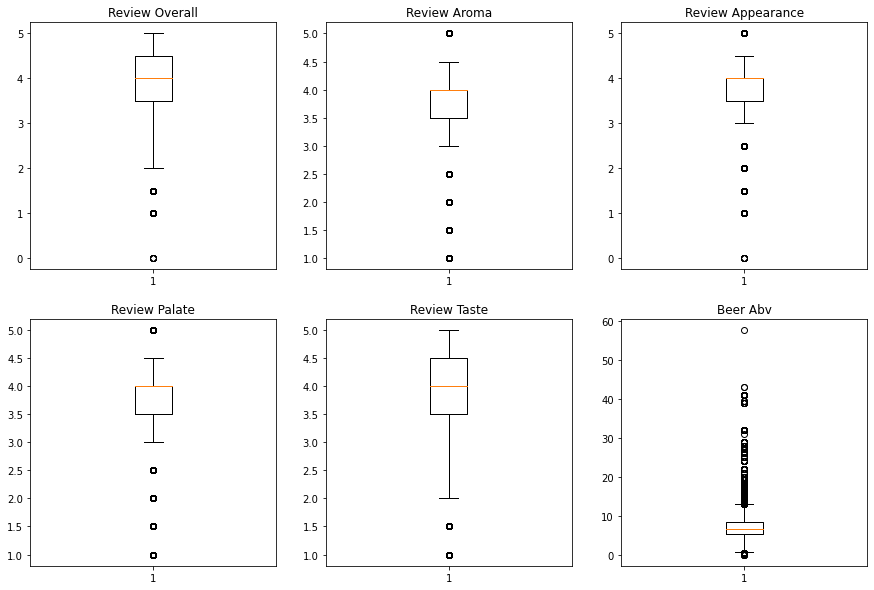

In [15]:
# Creating Boxplot for finding outliers for various numerical features

plt.subplots(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.boxplot(df["review_overall"])
plt.title('Review Overall')

plt.subplot(2, 3, 2)
plt.boxplot(df["review_aroma"])
plt.title('Review Aroma')

plt.subplot(2, 3, 3)
plt.boxplot(df["review_appearance"])
plt.title('Review Appearance')

plt.subplot(2, 3, 4)
plt.boxplot(df["review_palate"])
plt.title('Review Palate')

plt.subplot(2, 3, 5)
plt.boxplot(df["review_taste"])
plt.title('Review Taste')

plt.subplot(2, 3, 6)
plt.boxplot(df["beer_abv"])
plt.title('Beer Abv')

### Outcome from above Data Cleaning Processes:
* There were many missing values in beer_abv column, which can be taken care by filling with mean value.
* There were other columns as well where, missing value and few coloums that are not needed, thus new dataframe created without these columns.
* While plotting Boxplot, we can clearly see there are many outliers in every column, but **we can keep them as they all are in valid range.**

# -------------------------------------------------------------------------------------------------------------

# 2. DATA VISUALIZATION

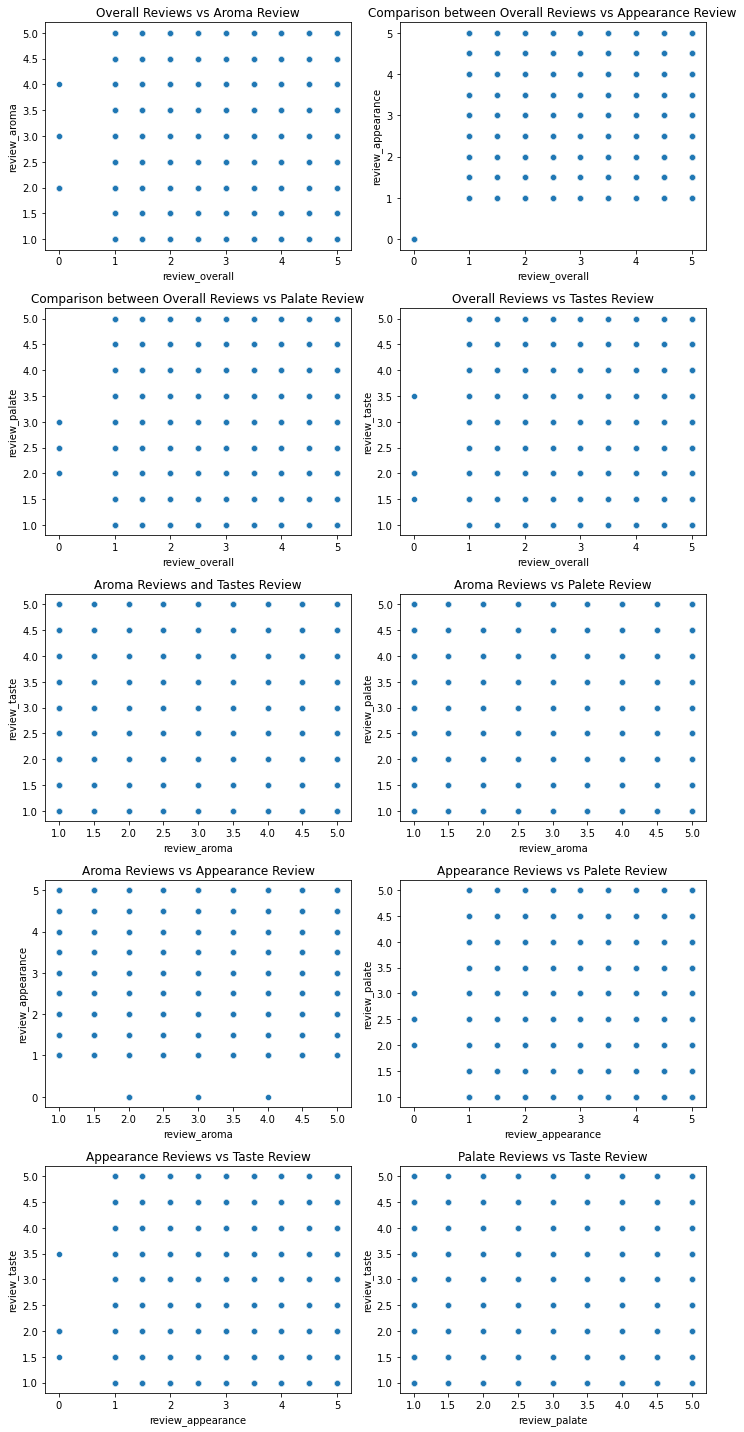

In [16]:
# Creating Scatterplot for finding relations between various numerical features

plt.subplots(figsize=(10,20))

plt.subplot(5, 2, 1)
sns.scatterplot(x='review_overall', y='review_aroma', data=df)
plt.title('Overall Reviews vs Aroma Review')

plt.subplot(5, 2, 2)
sns.scatterplot(x='review_overall', y='review_appearance', data=df)
plt.title('Comparison between Overall Reviews vs Appearance Review')

plt.subplot(5, 2, 3)
sns.scatterplot(x='review_overall', y='review_palate', data=df)
plt.title('Comparison between Overall Reviews vs Palate Review')

plt.subplot(5, 2, 4)
sns.scatterplot(x='review_overall', y='review_taste', data=df)
plt.title('Overall Reviews vs Tastes Review')

plt.subplot(5, 2, 5)
sns.scatterplot(x='review_aroma', y='review_taste', data=df)
plt.title('Aroma Reviews and Tastes Review')

plt.subplot(5, 2, 6)
sns.scatterplot(x='review_aroma', y='review_palate', data=df)
plt.title('Aroma Reviews vs Palete Review')

plt.subplot(5, 2, 7)
sns.scatterplot(x='review_aroma', y='review_appearance', data=df)
plt.title('Aroma Reviews vs Appearance Review')

plt.subplot(5, 2, 8)
sns.scatterplot(x='review_appearance', y='review_palate', data=df)
plt.title('Appearance Reviews vs Palete Review')

plt.subplot(5, 2, 9)
sns.scatterplot(x='review_appearance', y='review_taste', data=df)
plt.title('Appearance Reviews vs Taste Review')

plt.subplot(5, 2, 10)
sns.scatterplot(x='review_palate', y='review_taste', data=df)
plt.title('Palate Reviews vs Taste Review')

plt.tight_layout()

#### This visualization say:
* With this visualisations we can clearly see the strong correlation among the various numerical features.
* This relation shows tha while feature selection for model building, we can cleary opt for only one or two features.

### ----------------------------------------------------------------------------------------------------------------------------

<AxesSubplot:>

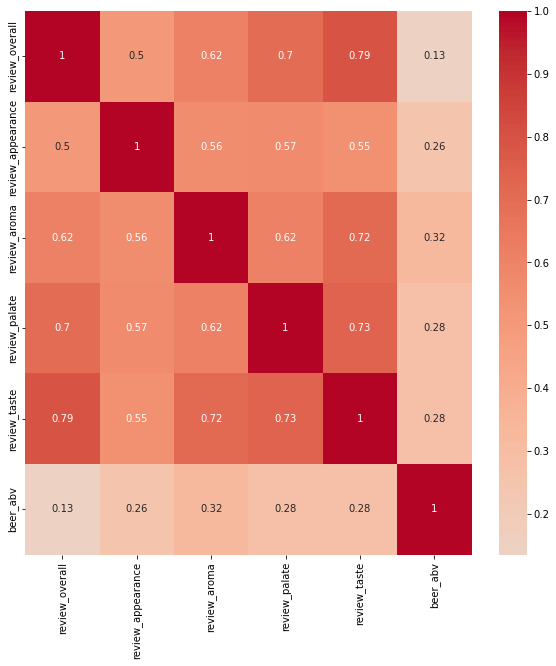

In [17]:
# Creating Heatmap to better understand the correlation between different features

plt.subplots(figsize=(10,10))

corr = df[['review_overall','review_appearance', 'review_aroma', 'review_palate', 'review_taste', 'beer_abv']].corr()

sns.heatmap(corr, annot = True, cmap = 'coolwarm', center = 0)

#### This visualization say:
* There is strong correlation between overall ratings and taste, palate and aroma.
* This also suggest that there is no such impact of Average Alcohol by Volumn (beer_abv) to the Overall Rating.

### ----------------------------------------------------------------------------------------------------------------------------

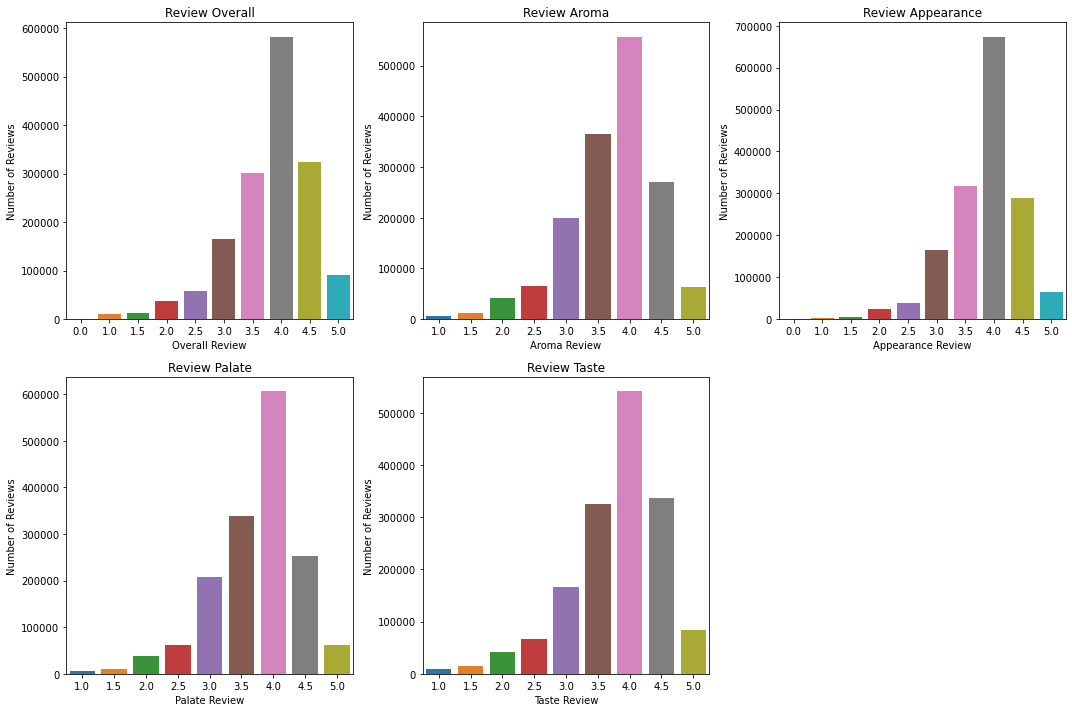

In [18]:
# Creating countplots to better understand the number of review between different features

plt.subplots(figsize=(15, 10))


plt.subplot(2, 3, 1)
sns.countplot(df["review_overall"])
plt.title('Review Overall')
plt.ylabel('Number of Reviews')
plt.xlabel('Overall Review')


plt.subplot(2, 3, 2)
sns.countplot(df["review_aroma"])
plt.title('Review Aroma')
plt.ylabel('Number of Reviews')
plt.xlabel('Aroma Review')


plt.subplot(2, 3, 3)
sns.countplot(df["review_appearance"])
plt.title('Review Appearance')
plt.ylabel('Number of Reviews')
plt.xlabel('Appearance Review')


plt.subplot(2, 3, 4)
sns.countplot(df["review_palate"])
plt.title('Review Palate')
plt.ylabel('Number of Reviews')
plt.xlabel('Palate Review')


plt.subplot(2, 3, 5)
sns.countplot(df["review_taste"])
plt.title('Review Taste')
plt.ylabel('Number of Reviews')
plt.xlabel('Taste Review')


plt.tight_layout()

#### This visualization say:
* We can see that most of the reviews have a score of 4.0, joined by 4.5 and 3.5.
* The distribution is skewed to the right, indicating that most of the reviews are positive for all parameters.

### ----------------------------------------------------------------------------------------------------------------------------

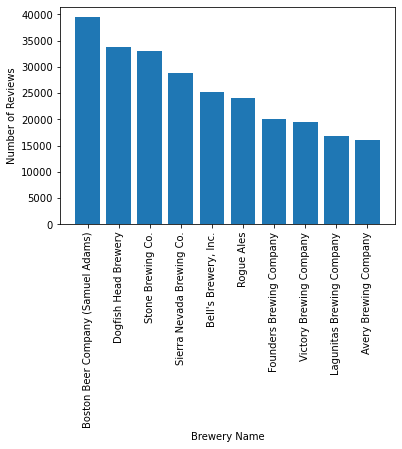

In [19]:
brewery_reviews = df['brewery_name'].value_counts()

# creating a bar chart of the number of reviews per brewery

plt.bar(x = brewery_reviews.index[:10], height = brewery_reviews.values[:10])
plt.xticks(rotation=90)
plt.xlabel('Brewery Name')
plt.ylabel('Number of Reviews')
plt.show()

#### This visualization say:
* Based on the number of reviews for Brewery, Boston Beer Company (Samuel Adams) is the best brewery.

### ----------------------------------------------------------------------------------------------------------------------------

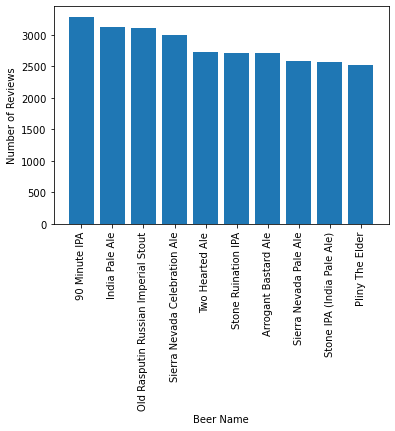

In [20]:
brewery_reviews = df['beer_name'].value_counts()

# create a bar chart of the number of reviews per Beer name

plt.bar(x = brewery_reviews.index[:10], height = brewery_reviews.values[:10])
plt.xticks(rotation=90)
plt.xlabel('Beer Name')
plt.ylabel('Number of Reviews')
plt.show()

#### This visualization say:
* Based on the number of reviews for beers, 90 Minute IMA is best beer.

### ----------------------------------------------------------------------------------------------------------------------------

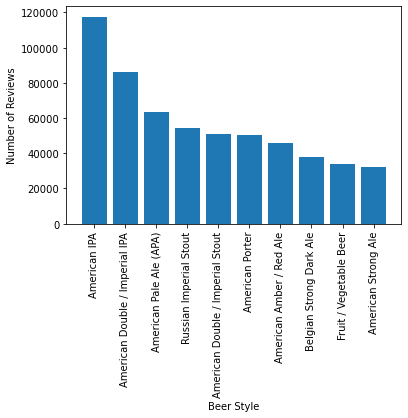

In [21]:
brewery_reviews = df['beer_style'].value_counts()

# create a bar chart of the number of reviews per Beer Style

plt.bar(x = brewery_reviews.index[:10], height = brewery_reviews.values[:10])
plt.xticks(rotation=90)
plt.xlabel('Beer Style')
plt.ylabel('Number of Reviews')
plt.show()

#### This visualization say:
* * Based on the number of reviews for beer styles, America IPA is most preferred beer style.

# -------------------------------------------------------------------------------------------------------------

# 3. DATA EXPLORATION

### Q: Which Beer is the best?

In [22]:
# Grouping the dataframe by 'beer_name' column and calculate the count of 'review_overall' column for each beer
beer_review_count = df.groupby("beer_name")["review_overall"].count().sort_values(ascending=False)

# Grouping the dataframe by 'beer_name' column and calculate the mean of 'review_overall' column for each beer
avg_review_rating = df.groupby("beer_name")["review_overall"].mean()

# Concatenating the above two along the column axis
result = pd.concat([beer_review_count, avg_review_rating], axis=1)

# Renaming
result.columns = ['review_count', 'avg_rating']

result.head(10)

,review_count,avg_rating
beer_name,,
90 Minute IPA,3290,4.145745
India Pale Ale,3130,3.842812
Old Rasputin Russian Imperial Stout,3111,4.174221
Sierra Nevada Celebration Ale,3000,4.168667
Two Hearted Ale,2728,4.329729
Arrogant Bastard Ale,2704,4.078402
Stone Ruination IPA,2704,4.161612
Sierra Nevada Pale Ale,2587,4.245845
Stone IPA (India Pale Ale),2575,4.257670


In [23]:
# Calculating weighted score for each beer
result['weighted_score'] = (result['review_count'] * result['avg_rating']) / (result['review_count'] + 100)

# Sorting by weighted score in descending order
result = result.sort_values(by = 'weighted_score', ascending=False)

# Top 10 beers by weighted score
result[['review_count', 'avg_rating', 'weighted_score']].head(10)

,review_count,avg_rating,weighted_score
beer_name,,,
Pliny The Elder,2527,4.590028,4.415303
Weihenstephaner Hefeweissbier,1981,4.515901,4.298895
Trappist Westvleteren 12,1272,4.617925,4.281341
Bell's Hopslam Ale,2443,4.377609,4.205466
Founders Breakfast Stout,2502,4.354516,4.187164
Tröegs Nugget Nectar,1955,4.395652,4.181752
Founders KBS (Kentucky Breakfast Stout),1932,4.397516,4.181102
Two Hearted Ale,2728,4.329729,4.176627
Duvel,2450,4.342245,4.171961


* Thus, we can say that most popular Beer is **Pliny The Elder**, followed by *Weihenstephaner Hefeweissbier* and *Trappist Westvleteren 12*.
* And if any person prefer the number of reviews any beer gets, then the best beer would be **90 Minute IPA**, followed by *India Pale Ale*.

### Q: What are the weirdest beers and why?

In [24]:
# Setting the threshold for the Overall Reviews for the beer
weird_threshold = 1.5

# Counting total reviews for the beer
total_reviews = df.groupby("beer_name")["beer_name"].count().sort_values(ascending=False)

# Applying condition that, those beer having less than threshold ratings, but then also, having high number of counts of review 
weird_beers = total_reviews[df.groupby("beer_name")["review_overall"].mean() < weird_threshold]

weird_beers.head(10)

beer_name
Crazy Ed's Cave Creek Chili Beer    267
Evil Eye                             52
MoonShot Beer                        19
Genuine ALE                          18
Stite Golden Pilsner                 18
Dixie White Moose                    16
Pit Bull                             13
Jaguar High Gravity Lager            12
El Lapino                            11
Stite Light Lager                     9
Name: beer_name, dtype: int64

* Thus, we can say that most weirdest Beer is **Crazy Ed's Cave Creek Chili Beer**, followed by *Evil Eye*.
* The reason why the beers with the lowest overall ratings are considered the weirdest is that people dislike their taste, aroma, appearance, and palate.
* However, a relatively large number of consumers have tried these beers and provided reviews for them.

### Q: Recommend 3 beers, based on all possible data horizons, to your buddy based on this dataset? And why?

* To recommend 3 beers to our buddy, we can look at the beers with a high review_count, and high weighted score. 
* Based on the output from the previous analysis, we can recommend the following beers:
    1. **Pliny The Elder** (From Weighted Score)
    
    2. **90 Minute IPA** (From Review Counts)
    
    3. **India Pale Ale** (From Review Counts)

### Q: What are the most important factors for estimating the overall quality of a beer?

In [25]:
df.corr()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
review_overall,1.000000,0.616008,0.501726,0.701910,0.789813,0.134896
review_aroma,0.616008,1.000000,0.561025,0.616942,0.716774,0.324357
review_appearance,0.501726,0.561025,1.000000,0.566628,0.546975,0.257510
review_palate,0.701910,0.616942,0.566628,1.000000,0.734131,0.279358
review_taste,0.789813,0.716774,0.546975,0.734131,1.000000,0.283268
beer_abv,0.134896,0.324357,0.257510,0.279358,0.283268,1.000000


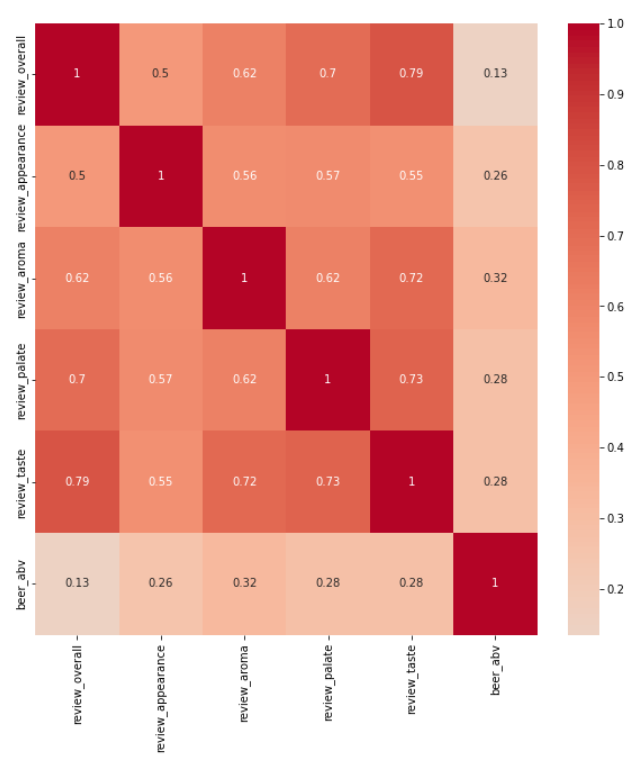

* Thus, based on the correlation table and the heatmap that we visualized earlier,
* we can conclude that the most important factor for overall beer quality is **Taste**, followed by *Palate* and *Aroma*.

### Q: Which brewery makes the best beers, according to reviewers?

In [26]:
brewery_reviews = df.groupby('brewery_name')['review_overall'].count().sort_values(ascending=False)

brewery_reviews = pd.DataFrame({'brewery_name': brewery_reviews.index, 'review_count': brewery_reviews.values})

# Group the dataframe by brewery name and calculate the mean rating for each
brewery_ratings = df.groupby('brewery_name')['review_overall'].mean().reset_index()

# Merge the brewery_ratings dataframe with the brewery_reviews dataframe on brewery name
merged = pd.merge(brewery_ratings, brewery_reviews, on ='brewery_name')

# Filter for the top 500 breweries by review count
top_10 = merged.sort_values('review_count', ascending=False).head(10)

# Sort the top 500 breweries by mean rating
top_breweries = top_10.sort_values('review_overall', ascending=False)

# Display the top 10 breweries with the highest mean rating
top_breweries[['brewery_name', 'review_overall']].head(10)

,brewery_name,review_overall
2262,Founders Brewing Company,4.114552
4743,Sierra Nevada Brewing Co.,4.056207
4950,Stone Brewing Co.,4.040268
5448,Victory Brewing Company,3.996252
413,"Bell's Brewery, Inc.",3.973066
3189,Lagunitas Brewing Company,3.955723
4489,Rogue Ales,3.908795
1963,Dogfish Head Brewery,3.836047
235,Avery Brewing Company,3.814584
701,Boston Beer Company (Samuel Adams),3.689522


* Thus, based on the above result, where the number of reviews are high and then from mean overall review,
* we can conclude that the brewery that makes the best beers is **Founders Brewing Company**, followed by *Sierra Nevada Brewing Co.* and *Stone Brewing Co.*.

### Q: Which is most poplular beer style?

In [27]:
beer_styles = df['beer_style'].value_counts()

beer_styles.head(10)

American IPA                        117584
American Double / Imperial IPA       85977
American Pale Ale (APA)              63469
Russian Imperial Stout               54129
American Double / Imperial Stout     50705
American Porter                      50477
American Amber / Red Ale             45751
Belgian Strong Dark Ale              37743
Fruit / Vegetable Beer               33861
American Strong Ale                  31945
Name: beer_style, dtype: int64

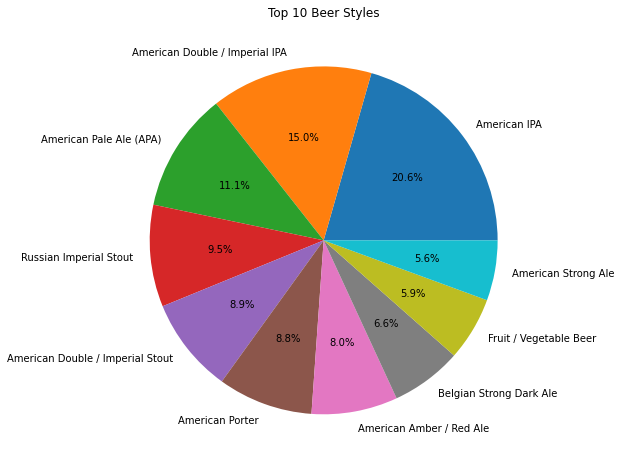

In [28]:
beer_styles = df['beer_style'].value_counts().head(10)

plt.figure(figsize = (8,8))
plt.pie(beer_styles, labels=beer_styles.index, autopct='%1.1f%%')
plt.title('Top 10 Beer Styles')
plt.show()

* Thus, based on the above result and pie chart,
* we can easily conclude that the best beer style is **American IPA**, followed by *American Double / Imperial IPA* and *American Pale Ale (APA)*.

### Q: Which brewery with the highest average beer ratings?

In [29]:
brewery_avg_ratings = df.groupby('brewery_name')['review_overall'].mean().sort_values(ascending=False)

best_brewery = brewery_avg_ratings.index[0]

print("The brewery with the highest average beer ratings in the dataset is:", best_brewery)

The brewery with the highest average beer ratings in the dataset is: Weissbräu Kösslarn


### Q: Which is the brewery with the most beers and reviews?

In [32]:
# Grouping the dataframe by brewery_name and count unique beer_name values and sum review_aroma values
brewery_stats = df.groupby("brewery_name").agg({"beer_name": pd.Series.nunique, "review_aroma": "sum"})

# Sorting the dataframe by beer_name count in descending order
brewery_stats = brewery_stats.sort_values("beer_name", ascending=False)

brewery_stats.head(1)

,beer_name,review_aroma
brewery_name,,
Rock Bottom Restaurant & Brewery,868,9027.0


# -------------------------------------------------------------------------------------------------------------

# 4.SUMMARIZATION:

### Here are the top insights from our EDA of the Beer dataset:

1. The beer styles with the highest ratings and most reviews are American IPA, American Double / Imperial IPA, and American Pale Ale. These styles are popular and widely available in the market.


2. The top-rated breweries based on average ratings and highest number of reviews are Founders Brewing Company, Sierra Nevada Brewing Co., and Stone Brewing Co.


3. There is a strong positive correlation between overall review score and scores for taste, aroma, and appearance.


4. The beers with the lowest ratings despite bit high sales are considered here as the weirdest in the dataset. These beers include:


5. Taste is the most important factor affecting overall beer quality, followed by palate and aroma. This conclusion is based on the correlation table and heatmap generated from the dataset.


6. Some of the best beers in the dataset are: 90 Minute IPA, India Pale Ale, Old Rasputin Russian Imperial Stout, Sierra Nevada Celebration Ale, Two Hearted Ale, Pliny The Elder, Weihenstephaner Hefeweissbier, Trappist Westvleteren, Bell's Hopslam Ale, Founders Breakfast Stout


7. The brewery with the highest average beer ratings is: "Weissbräu Kösslarn"


8. The brewery with the most beers and reviews is: "Rock Bottom Restaurant & Brewery" (2476)

# ........................................................................................................................